In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
# load pre survey data for 2021 
pre_df = pd.read_csv("../data/processed/pre_survey.csv")

### Dataset exploration

In [3]:
pre_df.head()

,ID,Email,Name,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8
0,1,anonymous,NaN,Project Manager;Subject Matter Expert (SME);,Yes I have attended Project Management Trainin...,Multiple Projects,I have been involved in various Projects and I...,"Migration of CRM. In this Project, we are tryi...",5,"Strategic, Analytical and Collaborative",Maintaining Project on Track with respect to r...
1,2,anonymous,NaN,Project Manager;,No,Multiple Projects,"I manage multiple program schedules and teams,...",Phase 2 Renovations. Our organization is prepa...,45,"Commitment to the project and a unified goal, ...",Reduced efficiency and timeline drag due from ...
2,3,anonymous,NaN,Not sure;non profit doing projects? ;,Nope!,Multiple Projects,Multiple community based projects (event plann...,"We are currently doing a community wide ""Needs...",10-May,Not sure if TEAM is an acronym for something h...,- taking the ideas and translating them into t...
3,4,anonymous,NaN,Project Manager;,I had some training during my master's degree ...,Multiple Projects,Personal & professional,I am looking after Immunization Uptake Project...,3,commitment,Working with multiple stakeholders & communities
4,5,anonymous,NaN,Project Team Member;,No\n,Multiple Projects,Funded/fund-raising/awareness events and year ...,Funded/fund-raising/awareness events and year ...,04-Feb,Vision and intend.,Understanding communication styles.


In [4]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          6 non-null      int64  
 1   Email       6 non-null      object 
 2   Name        0 non-null      float64
 3   question_1  6 non-null      object 
 4   question_2  6 non-null      object 
 5   question_3  6 non-null      object 
 6   question_4  6 non-null      object 
 7   question_5  6 non-null      object 
 8   question_6  6 non-null      object 
 9   question_7  6 non-null      object 
 10  question_8  6 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 656.0+ bytes


In [5]:
pre_df = pre_df.rename(columns={"question_1": "attendee_roles", 
                       "question_2": "previous_attendenance", 
                       "question_3": "work_project_types", 
                       "question_4": "desc_mp",
                       "question_5": "proj_descp",
                      "question_6": "team_num",
                      "question_7": "team_strength",
                      "question_8": "proj_challenges"})

In [6]:
pre_df.shape

(6, 11)

There are 6 rows and 11 columns in the original dataset.

In [7]:
pre_df

,ID,Email,Name,attendee_roles,previous_attendenance,work_project_types,desc_mp,proj_descp,team_num,team_strength,proj_challenges
0,1,anonymous,NaN,Project Manager;Subject Matter Expert (SME);,Yes I have attended Project Management Trainin...,Multiple Projects,I have been involved in various Projects and I...,"Migration of CRM. In this Project, we are tryi...",5,"Strategic, Analytical and Collaborative",Maintaining Project on Track with respect to r...
1,2,anonymous,NaN,Project Manager;,No,Multiple Projects,"I manage multiple program schedules and teams,...",Phase 2 Renovations. Our organization is prepa...,45,"Commitment to the project and a unified goal, ...",Reduced efficiency and timeline drag due from ...
2,3,anonymous,NaN,Not sure;non profit doing projects? ;,Nope!,Multiple Projects,Multiple community based projects (event plann...,"We are currently doing a community wide ""Needs...",10-May,Not sure if TEAM is an acronym for something h...,- taking the ideas and translating them into t...
3,4,anonymous,NaN,Project Manager;,I had some training during my master's degree ...,Multiple Projects,Personal & professional,I am looking after Immunization Uptake Project...,3,commitment,Working with multiple stakeholders & communities
4,5,anonymous,NaN,Project Team Member;,No\n,Multiple Projects,Funded/fund-raising/awareness events and year ...,Funded/fund-raising/awareness events and year ...,04-Feb,Vision and intend.,Understanding communication styles.
5,6,anonymous,NaN,Project Manager;,Yes I used to participate as a Pmi member before,Multiple Projects,N. A,I would love to participate as a trainer volun...,N.A.,N.A.,Wrong comunication \n


In [8]:
### data cleaning 
pre_df = pre_df.replace(to_replace ="10-May",
                 value ="5-10")
pre_df = pre_df.replace(to_replace ="04-Feb",
                 value ="2-4")

pre_df['mp_team_cat'] = ['below 5', 'above 20', '6-10', 'below 5', 'below 5', 'NA']
pre_df['prev_att_cat'] = ['Yes', 'No', 'No', 'Yes', 'No', 'Yes']

### Question 1: Do you consider yourself to be one or more of the following roles (please select all that apply

In [9]:
pre_df.attendee_roles.unique()

array(['Project Manager;Subject Matter Expert (SME);', 'Project Manager;',
       'Not sure;non profit doing projects? ;', 'Project Team Member;'],
      dtype=object)

In [10]:
q1_df = pre_df[["ID", "attendee_roles"]]
q1_df_new = q1_df.copy()

In [11]:
q1_df_new = q1_df_new.assign(attendee_roles=q1_df_new.attendee_roles.str.split(";")).explode('attendee_roles')
q1_df_new['attendee_roles'].replace('', np.nan, inplace=True)
q1_df_new.dropna(subset=['attendee_roles'], inplace=True)

In [12]:
q1_df_new

,ID,attendee_roles
0,1,Project Manager
0,1,Subject Matter Expert (SME)
1,2,Project Manager
2,3,Not sure
2,3,non profit doing projects?
3,4,Project Manager
4,5,Project Team Member
5,6,Project Manager


In [16]:
bar = alt.Chart(q1_df_new, title="Current roles of workshop participants, (n=6)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['attendee_roles']
).transform_calculate(
    percent=alt.datum.total/6
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('attendee_roles', sort='x', title="")
    ).properties(
    width=400,
    height=200
    )

text = alt.Chart(q1_df_new, title="Current roles of workshop participants, (n=6)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['attendee_roles']
).transform_calculate(
    percent=alt.datum.total/6
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('attendee_roles', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=200
    )

q1_plot = alt.layer(bar, text, data=q1_df_new)

# Show the plot|
q1_plot

alt.LayerChart(...)

### Question 2: Have you ever attended a course or viewed an educational webinar about project management?  If so please describe this training.

In [17]:
pre_df.previous_attendenance.unique()

array(['Yes I have attended Project Management Training and earned 35 PDUs earlier. ',
       'No', 'Nope! ',
       "I had some training during my master's degree course ", 'No\n',
       'Yes I used to participate as a Pmi member before '], dtype=object)

In [18]:
yes_bool = pre_df["previous_attendenance"].str.contains('Yes|some')

In [19]:
yes_bool.value_counts(normalize=True)

True     0.5
False    0.5
Name: previous_attendenance, dtype: float64

In [22]:
bar = alt.Chart(pre_df, title="Previous experience with project manangement content, (n=6)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['prev_att_cat']
).transform_calculate(
    percent=alt.datum.total/6
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('prev_att_cat', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(pre_df, title="Previous experience with project manangement content, (n=6)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['prev_att_cat']
).transform_calculate(
    percent=alt.datum.total/6
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('prev_att_cat', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q2_plot = alt.layer(bar, text, data=pre_df)

# Show the plot|
q2_plot

alt.LayerChart(...)

### Question 3: At work are you typically focused on one project at a time or multiple projects?

In [23]:
pre_df.work_project_types.value_counts()

Multiple Projects    6
Name: work_project_types, dtype: int64

### Question 4: If multiple projects, please describe or type N/A for not applicable?

### Question 7: Approximately how many team members, including you, will be active on that particular project?

In [24]:
pre_df.team_num.value_counts()

5       1
45      1
5-10    1
3       1
2-4     1
N.A.    1
Name: team_num, dtype: int64

Note: make these integers or category options in the survey for better analysis

In [25]:
pre_df.mp_team_cat.value_counts()

below 5     3
above 20    1
6-10        1
NA          1
Name: mp_team_cat, dtype: int64

In [27]:
bar = alt.Chart(pre_df, title="No: of team members involved in current projects, (n=6)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['mp_team_cat']
).transform_calculate(
    percent=alt.datum.total/6
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('mp_team_cat', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text = alt.Chart(pre_df, title="No: of team members involved in current projects, (n=6)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['mp_team_cat']
).transform_calculate(
    percent=alt.datum.total/6
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('mp_team_cat', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q7_plot = alt.layer(bar, text, data=pre_df)

# Show the plot|
q7_plot

alt.LayerChart(...)

### NLP processing of open-text questions

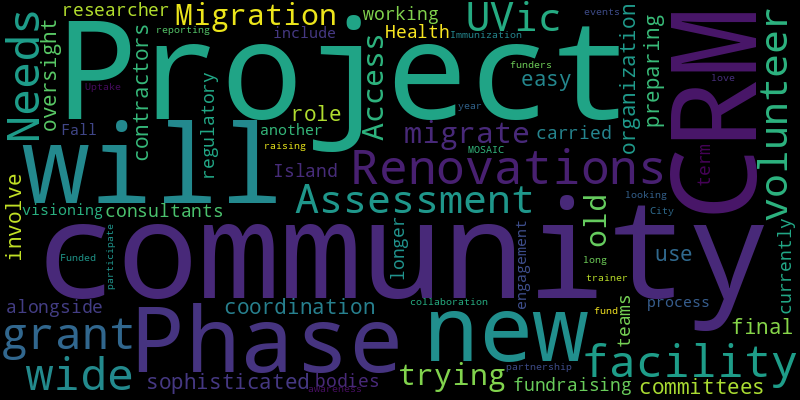

In [113]:
# EDA Initial word cloud 
from wordcloud import WordCloud
words = " ".join(pre_df["proj_descp"].tolist())
wordcloud = WordCloud(width=800, height=400, random_state=591)
wc = wordcloud.generate(words).to_image()
wc

In [92]:
import spacy
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [93]:
nlp.max_length = 1850000

In [94]:
pre_df.proj_descp.unique()

array(['Migration of CRM. In this Project, we are trying to migrate an old Access CRM to a new CRM-Which is more sophisticated and easy to use.',
       'Phase 2 Renovations. Our organization is preparing for the final phase of renovations to our new facility and my role will involve coordination of facility oversight committees, contractors, grant and fundraising teams, consultants and volunteers while working alongside Island Health and other regulatory bodies. ',
       'We are currently doing a community wide "Needs Assessment" with a UVic researcher. This needs assessment will then be carried into a longer term community wide visioning process in Fall 2022. This project will include community engagement, another partnership with UVic, collaboration with the City, and reporting out to community and grant funders. ',
       'I am looking after Immunization Uptake Project with MOSAIC ',
       'Funded/fund-raising/awareness events and year long projects.',
       'I would love to par

In [128]:
proj_descp_text = pre_df.proj_descp.str.cat(sep = ' ')

In [129]:
proj_descp_text

'Migration of CRM. In this Project, we are trying to migrate an old Access CRM to a new CRM-Which is more sophisticated and easy to use. Phase 2 Renovations. Our organization is preparing for the final phase of renovations to our new facility and my role will involve coordination of facility oversight committees, contractors, grant and fundraising teams, consultants and volunteers while working alongside Island Health and other regulatory bodies.  We are currently doing a community wide "Needs Assessment" with a UVic researcher. This needs assessment will then be carried into a longer term community wide visioning process in Fall 2022. This project will include community engagement, another partnership with UVic, collaboration with the City, and reporting out to community and grant funders.  I am looking after Immunization Uptake Project with MOSAIC  Funded/fund-raising/awareness events and year long projects. I would love to participate as a trainer volunteer  '

In [97]:
doc = nlp(proj_descp_text, disable = ['ner'])

In [98]:
from collections import Counter
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] 

word_freq = Counter(words) 
word_freq.most_common(20)

[(' ', 4),
 ('community', 4),
 ('CRM', 3),
 ('Project', 2),
 ('new', 2),
 ('phase', 2),
 ('renovation', 2),
 ('facility', 2),
 ('grant', 2),
 ('volunteer', 2),
 ('wide', 2),
 ('need', 2),
 ('assessment', 2),
 ('long', 2),
 ('project', 2),
 ('Migration', 1),
 ('try', 1),
 ('migrate', 1),
 ('old', 1),
 ('Access', 1)]

In [104]:
from spacy.matcher import Matcher 
matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 
matches = matcher(doc, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)
phrase_freq.most_common(50)

[('final phase', 1),
 ('new facility', 1),
 ('regulatory bodies', 1),
 ('uvic researcher', 1),
 ('longer term', 1),
 ('wide visioning', 1),
 ('long projects', 1)]

### Question 8: What common and/or recurring issues and challenges do you encounter while being part of a project? (list and briefly describe TOP three if you can)

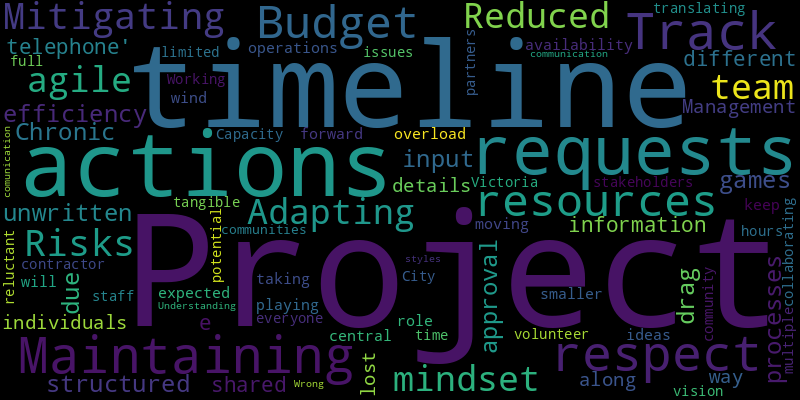

In [117]:
words = " ".join(pre_df["proj_challenges"].tolist())
wordcloud = WordCloud(width=800, height=400, random_state=591)
wc = wordcloud.generate(words).to_image()
wc

In [118]:
pre_df.proj_challenges.unique()

array(['Maintaining Project on Track with respect to resources, timelines and Budget. Mitigating Risks. Adapting agile mindset in the team',
       "Reduced efficiency and timeline drag due from under-structured or unwritten input and approval processes. Chronic games of 'telephone' i.e. the same information being shared with different individuals over and over again with details being lost along the way.\nProject Management availability/overload -I will wind up playing the central role in this project, but I am also expected to keep operations and all other smaller projects moving forward. ",
       "- taking the ideas and translating them into tangible actions/requests. \n- Capacity issues (I'm the only full time staff, everyone else is volunteer / very limited hours contractor) \n- reluctant partners (the City of Victoria) in collaborating on potential actions/requests/community vision ",
       'Working with multiple stakeholders & communities ',
       'Understanding communication

In [116]:
def preprocess_spacy(
    text,
    min_token_len=3,
    irrelevant_pos=["ADV", "PRON", "CCONJ", "PUNCT", "PART", "DET", "ADP", "NUM", "SYM"],
):
    """
    Given text, min_token_len, and irrelevant_pos carry out preprocessing of the text
    and return a preprocessed string.

    Parameters
    -------------
    text : (spaCy doc object)
        the spacy doc object of the text
    min_token_len : (int)
        min_token_length required
    irrelevant_pos : (list)
        a list of irrelevant pos tags

    Returns
    -------------
    (str) the preprocessed text
    """
    
    clean_text = []
    
    for token in text:
        if (
            token.is_stop == False # Check if it's not a stopword
            and len(token) > min_token_len  # Check if the word meets minimum threshold
            and token.pos_ not in irrelevant_pos # Check if the POS is in the acceptable POS tags
        ):  
            lemma = token.lemma_  
            clean_text.append(lemma.lower()) 
            
    return " ".join(clean_text)

In [119]:
import re
def preprocess(text):
    # Replace a sequence of whitespaces by a single whitespace
    text = re.sub(r"\s+", " ", text)
    
    # Remove other strange characters
    text = re.sub(r"""[\n\r]+""", "", text)
    
    # Remove other strange characters
    text = re.sub(r"""[\*\~]+""", "", text)

    # Replace slashes with spaces
    text = re.sub(r"""[\/]+""", " ", text)

    return text

In [121]:
q8_df = pd.DataFrame()
q8_df = pre_df[["proj_challenges"]]

In [123]:
q8_df["pp_text"] = q8_df["proj_challenges"].apply(preprocess)
q8_df.dropna()

/var/folders/lx/k5799j011wz6q8hpjbh635sc0000gn/T/ipykernel_92845/1531616629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q8_df["pp_text"] = q8_df["proj_challenges"].apply(preprocess)


,proj_challenges,pp_text
0,Maintaining Project on Track with respect to r...,Maintaining Project on Track with respect to r...
1,Reduced efficiency and timeline drag due from ...,Reduced efficiency and timeline drag due from ...
2,- taking the ideas and translating them into t...,- taking the ideas and translating them into t...
3,Working with multiple stakeholders & communities,Working with multiple stakeholders & communities
4,Understanding communication styles.,Understanding communication styles.
5,Wrong comunication \n,Wrong comunication


In [124]:
q8_df["pp_text"] = [
    preprocess_spacy(spacy_text) for spacy_text in nlp.pipe(q8_df["pp_text"])
]

/var/folders/lx/k5799j011wz6q8hpjbh635sc0000gn/T/ipykernel_92845/1436732373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q8_df["pp_text"] = [


In [125]:
q8_df

,proj_challenges,pp_text
0,Maintaining Project on Track with respect to r...,maintain project track respect resource timeli...
1,Reduced efficiency and timeline drag due from ...,reduced efficiency timeline drag structured un...
2,- taking the ideas and translating them into t...,take idea translate tangible action request ca...
3,Working with multiple stakeholders & communities,work multiple stakeholder community
4,Understanding communication styles.,understand communication style
5,Wrong comunication \n,wrong comunication


In [126]:
q8_df.pp_text.unique()

array(['maintain project track respect resource timeline budget mitigating risks adapt agile mindset team',
       'reduced efficiency timeline drag structured unwritten input approval process chronic game telephone i.e. information share different individual detail lose project management availability overload wind play central role project expect operation small project move',
       'take idea translate tangible action request capacity issue time staff volunteer limited hour contractor reluctant partner city victoria collaborate potential action request community vision',
       'work multiple stakeholder community',
       'understand communication style', 'wrong comunication'],
      dtype=object)

In [130]:
proj_challenges_text = q8_df.pp_text.str.cat(sep = ' ')

In [131]:
doc = nlp(proj_challenges_text, disable = ['ner'])

In [132]:
from collections import Counter
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] 

word_freq = Counter(words) 
word_freq.most_common(20)

[('project', 4),
 ('timeline', 2),
 ('action', 2),
 ('request', 2),
 ('community', 2),
 ('maintain', 1),
 ('track', 1),
 ('respect', 1),
 ('resource', 1),
 ('budget', 1),
 ('mitigate', 1),
 ('risk', 1),
 ('adapt', 1),
 ('agile', 1),
 ('mindset', 1),
 ('team', 1),
 ('reduce', 1),
 ('efficiency', 1),
 ('drag', 1),
 ('structure', 1)]

In [127]:
### LDA topic modelling 

In [134]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [137]:
# Create a vocabulary for the lda model and
# convert our corpus into document-term matrix for Lda
preprocessed_corpus = [doc.split() for doc in q8_df["pp_text"].tolist()]
dictionary = corpora.Dictionary(preprocessed_corpus)
# Optional
# dictionary.filter_extremes(no_below=3, no_above=0.3, keep_n=100000)
len(dictionary)

72

In [138]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in preprocessed_corpus]
# print(doc_term_matrix[0])
d = [(dictionary[idx], freq) for (idx, freq) in doc_term_matrix[0]]
pd.DataFrame(d, columns=["word", "frequency"])

,word,frequency
0,adapt,1
1,agile,1
2,budget,1
3,maintain,1
4,mindset,1
5,mitigating,1
6,project,1
7,resource,1
8,respect,1
9,risks,1


In [139]:
from gensim.models import CoherenceModel

K = [3, 4, 5, 6, 7, 8]

coherence_scores = []

for num_topics in K:
    lda = LdaModel(
        corpus=doc_term_matrix,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
    )
    coherence_model_lda = CoherenceModel(
        model=lda, texts=preprocessed_corpus, dictionary=dictionary, coherence="c_v"
    )
    coherence_scores.append(coherence_model_lda.get_coherence())

In [140]:
coherence_df = pd.DataFrame(coherence_scores, index=K, columns=["Coherence score"])
coherence_df

,Coherence score
3,0.720157
4,0.778257
5,0.678161
6,0.625008
7,0.630604
8,0.643882


In [142]:
lda4 = LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    passes=10,
)
pd.DataFrame(lda4.print_topics(), columns=["Topic id", "Topic words"])

,Topic id,Topic words
0,0,"0.059*""understand"" + 0.059*""style"" + 0.059*""co..."
1,1,"0.054*""request"" + 0.054*""action"" + 0.030*""comm..."
2,2,"0.038*""comunication"" + 0.038*""wrong"" + 0.038*""..."
3,3,"0.059*""project"" + 0.023*""timeline"" + 0.023*""dr..."


In [143]:
lda4.print_topics()

[(0,
  '0.059*"understand" + 0.059*"style" + 0.059*"communication" + 0.012*"request" + 0.012*"action" + 0.012*"collaborate" + 0.012*"volunteer" + 0.012*"community" + 0.012*"city" + 0.012*"limited"'),
 (1,
  '0.054*"request" + 0.054*"action" + 0.030*"community" + 0.030*"take" + 0.030*"vision" + 0.030*"staff" + 0.030*"tangible" + 0.030*"potential" + 0.030*"translate" + 0.030*"issue"'),
 (2,
  '0.038*"comunication" + 0.038*"wrong" + 0.038*"respect" + 0.038*"resource" + 0.038*"risks" + 0.038*"track" + 0.038*"team" + 0.038*"budget" + 0.038*"maintain" + 0.038*"mitigating"'),
 (3,
  '0.059*"project" + 0.023*"timeline" + 0.023*"drag" + 0.023*"central" + 0.023*"play" + 0.023*"operation" + 0.023*"expect" + 0.023*"process" + 0.023*"unwritten" + 0.023*"share"')]

In [144]:
### creating bi-grams

In [146]:
import nltk
from nltk import bigrams
import networkx as nx

In [152]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(text)) for text in nlp.pipe(q8_df['pp_text'])]

# View bigrams for the first tweet
terms_bigram[0]

[(maintain, project),
 (project, track),
 (track, respect),
 (respect, resource),
 (resource, timeline),
 (timeline, budget),
 (budget, mitigating),
 (mitigating, risks),
 (risks, adapt),
 (adapt, agile),
 (agile, mindset),
 (mindset, team)]

In [156]:
import itertools
import collections
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[((maintain, project), 1),
 ((project, track), 1),
 ((track, respect), 1),
 ((respect, resource), 1),
 ((resource, timeline), 1),
 ((timeline, budget), 1),
 ((budget, mitigating), 1),
 ((mitigating, risks), 1),
 ((risks, adapt), 1),
 ((adapt, agile), 1),
 ((agile, mindset), 1),
 ((mindset, team), 1),
 ((reduced, efficiency), 1),
 ((efficiency, timeline), 1),
 ((timeline, drag), 1),
 ((drag, structured), 1),
 ((structured, unwritten), 1),
 ((unwritten, input), 1),
 ((input, approval), 1),
 ((approval, process), 1)]

In [157]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(maintain, project)",1
1,"(project, track)",1
2,"(track, respect)",1
3,"(respect, resource)",1
4,"(resource, timeline)",1
5,"(timeline, budget)",1
6,"(budget, mitigating)",1
7,"(mitigating, risks)",1
8,"(risks, adapt)",1
9,"(adapt, agile)",1


In [175]:
### visualize network 
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [176]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


TypeError: Argument 'other' has incorrect type (expected spacy.tokens.token.Token, got str)

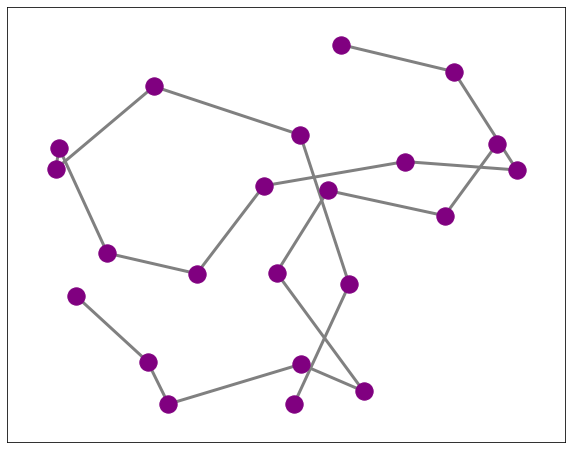

In [177]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()